# Decision Trees in Machine Learning

Decision Trees are a supervised learning algorithm used for **both classification and regression** tasks. They work by **splitting the dataset into subsets** based on the value of input features, creating a tree-like structure.

**Key Concepts:**
- **Nodes**: Represent decisions or tests on a feature.
- **Edges**: Represent outcomes of a decision or test.
- **Leaves**: Represent the final prediction or outcome.

**Advantages:**
- Easy to understand and interpret.
- Handles both numerical and categorical data.
- Requires little data preprocessing.

**Disadvantages:**
- Prone to overfitting, especially with deep trees.
- Can be unstable with small changes in data.

Decision Trees are often used as building blocks for more complex models like Random Forests and Gradient Boosted Trees.

<img src="https://www.mdpi.com/applsci/applsci-11-06728/article_deploy/html/images/applsci-11-06728-g001.png" style="width:600px; height:500px"/>

## Decision Tree Classifier

In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import a suitable seaborn database suitable for decision tree 

from seaborn import load_dataset

df = load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
# info and describe of dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

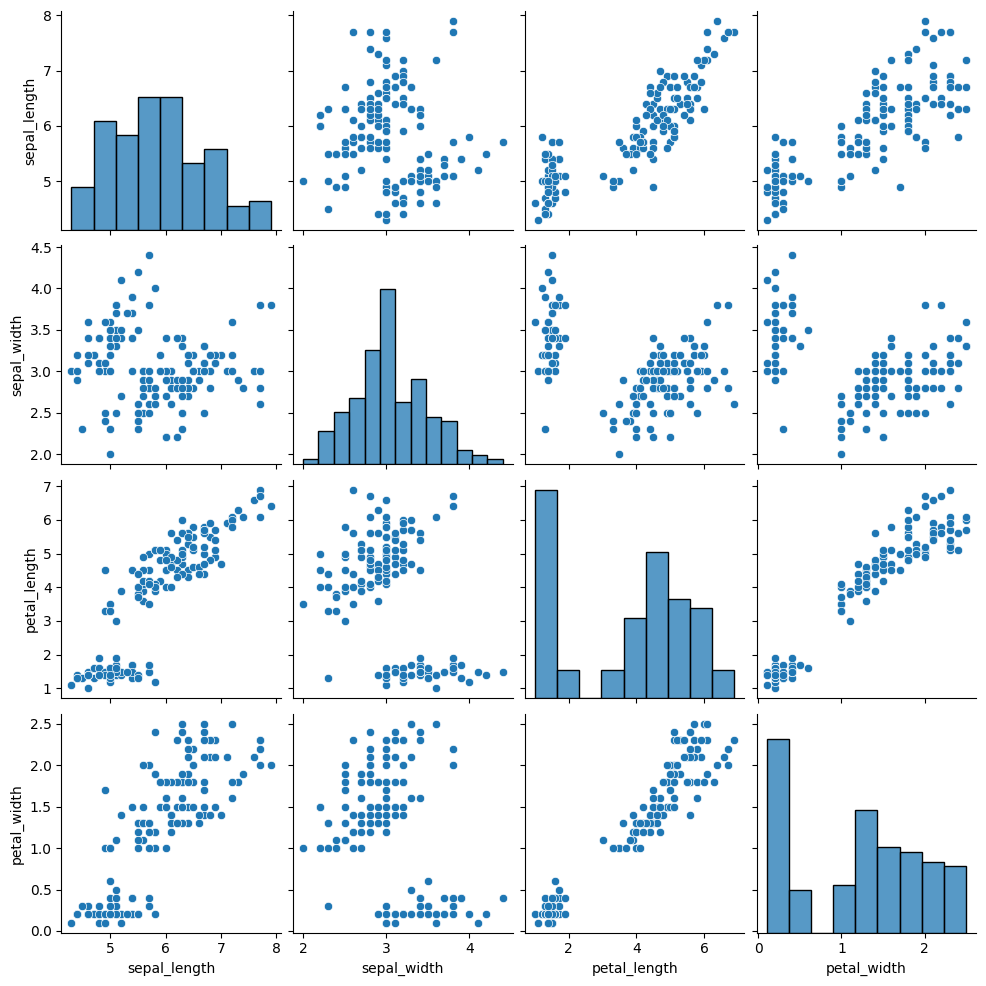

In [10]:
# see the relationship with pairplot
sns.pairplot(df)
plt.show()

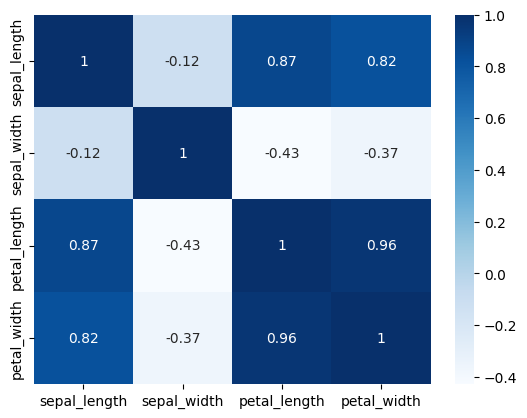

In [12]:
# see the relations with heatmap seaborn
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()

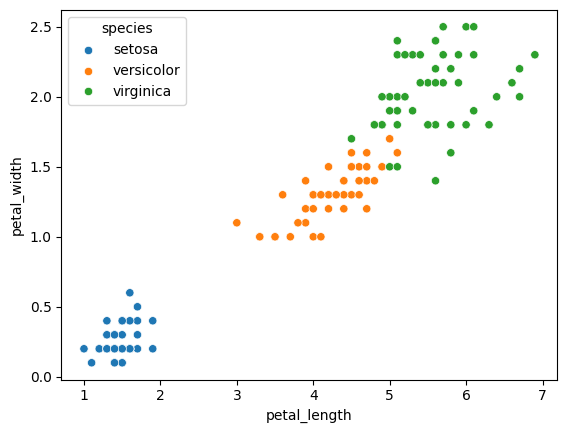

In [13]:
# see petal_length and petal_width
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df)
plt.show()

In [14]:
# X and y variables
X = df.drop('species', axis=1)
y = df['species']
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [17]:
# split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [ ]:
# create decison tree classifier
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None



### DecisionTreeClassifier parameters
- criterion: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.
- max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- min_samples_split: The minimum number of samples required to split an internal node.
- min_samples_leaf: The minimum number of samples required to be at a leaf node.
- max_features: The number of features to consider when looking for the best split.


<img src="https://towardsdatascience.com/wp-content/uploads/2022/11/1H6thrs5CR_wdxQyMCwWawQ.png"/>

<img src="https://ashutoshtripathi.com/wp-content/uploads/2021/09/image-1.png?w=1024"/>

<img src="https://media.licdn.com/dms/image/v2/D4D10AQFPOcjorN460Q/image-shrink_1280/image-shrink_1280/0/1737750482415?e=2147483647&v=beta&t=GPXbLmC8l7ltLLLBbWK6c64r7nVm2uYo4DkY2EwvHMI"/>

In [21]:
# predictions
predictions = model.predict(X_test)
predictions

array(['setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor'], dtype=object)

In [22]:
# see the metrics
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.95      0.95      0.95        20
   virginica       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



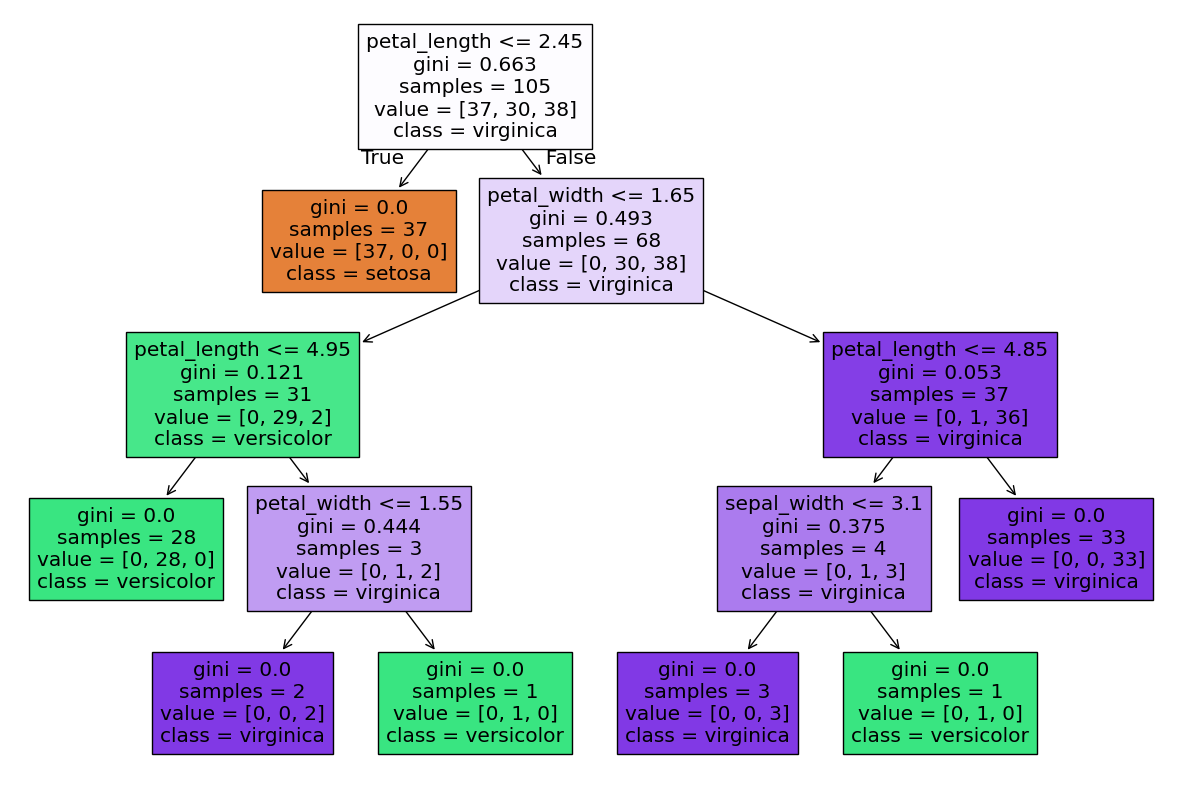

In [31]:
# show tree with sklearn
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,feature_names=X.columns, class_names=model.classes_, filled=True)
plt.show()